## **Model 16: Model 11 (Adam + batch size 16) + Dropout (0.3) + BatchNorm**

**Preprocessing with batch size = 16**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 16
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [2]:
def build_medium_cnn_leakyrelu_bn_dropout(input_shape=(128,128,3), num_classes=4):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.1),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Build Model 16
model16 = build_medium_cnn_leakyrelu_bn_dropout()
model16.summary()

d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,604 (16.36 MB)

 Trainable params: 4,288,900 (16.36 MB)

 Non-trainable params: 704 (2.75 KB)

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(
        monitor='val_loss', patience=5, min_delta=1e-3,
        restore_best_weights=True, verbose=1
    ),
    ModelCheckpoint(
        filepath='models/model16_best.h5',
        monitor='val_loss', save_best_only=True, verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3,
        min_lr=1e-6, verbose=1
    )
]

**Compile**

In [4]:
model16.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Train**

In [5]:
history16 = model16.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7115 - loss: 0.7946
Epoch 1: val_loss improved from None to 0.96683, saving model to models/model16_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 70s 232ms/step - accuracy: 0.7740 - loss: 0.6233 - val_accuracy: 0.5405 - val_loss: 0.9668 - learning_rate: 0.0010
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8397 - loss: 0.4204
Epoch 2: val_loss improved from 0.96683 to 0.39401, saving model to models/model16_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 221ms/step - accuracy: 0.8529 - loss: 0.3954 - val_accuracy: 0.8565 - val_loss: 0.3940 - learning_rate: 0.0010
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.8723 - loss: 0.3377
Epoch 3: val_loss did not improve from 0.39401
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 220ms/step - accuracy: 0.8848 - loss: 0.3055 - val_accuracy: 0.7676 - val_loss: 0.7456 - learning_rate: 0.0010
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9127 - loss: 0.2450
Epoch 4: val_loss did not improve from 0.39401
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 222ms/step - accuracy: 0.9248 - loss: 0.2251 - val_accuracy: 0.7606 - val_loss: 1.0133 - learning_rate: 0.0010
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9266 - loss: 0.2069
Epoch 5: val_loss did not improve from 0.39401

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
286/286 ━━━━━━━━━━━━━━━━━━━━ 64s 225ms/step - accuracy: 0.9338 - loss: 0.1910 - val_ac

286/286 ━━━━━━━━━━━━━━━━━━━━ 64s 223ms/step - accuracy: 0.9635 - loss: 0.1176 - val_accuracy: 0.9261 - val_loss: 0.2197 - learning_rate: 5.0000e-04
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9710 - loss: 0.0947
Epoch 7: val_loss did not improve from 0.21967
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 221ms/step - accuracy: 0.9762 - loss: 0.0842 - val_accuracy: 0.9014 - val_loss: 0.2963 - learning_rate: 5.0000e-04
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.9706 - loss: 0.0884
Epoch 8: val_loss did not improve from 0.21967
286/286 ━━━━━━━━━━━━━━━━━━━━ 64s 222ms/step - accuracy: 0.9731 - loss: 0.0847 - val_accuracy: 0.9040 - val_loss: 0.2871 - learning_rate: 5.0000e-04
Epoch 9/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9756 - loss: 0.0771
Epoch 9: val_loss did not improve from 0.21967

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 221ms/step - accuracy: 0.9799 - loss: 0.0

286/286 ━━━━━━━━━━━━━━━━━━━━ 64s 223ms/step - accuracy: 0.9865 - loss: 0.0515 - val_accuracy: 0.9428 - val_loss: 0.1857 - learning_rate: 2.5000e-04
Epoch 11/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9864 - loss: 0.0455
Epoch 11: val_loss did not improve from 0.18568
286/286 ━━━━━━━━━━━━━━━━━━━━ 62s 217ms/step - accuracy: 0.9891 - loss: 0.0420 - val_accuracy: 0.9111 - val_loss: 0.2721 - learning_rate: 2.5000e-04
Epoch 12/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9919 - loss: 0.0345
Epoch 12: val_loss improved from 0.18568 to 0.15869, saving model to models/model16_best.h5


286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 220ms/step - accuracy: 0.9924 - loss: 0.0324 - val_accuracy: 0.9516 - val_loss: 0.1587 - learning_rate: 2.5000e-04
Epoch 13/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9913 - loss: 0.0318
Epoch 13: val_loss did not improve from 0.15869
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 220ms/step - accuracy: 0.9921 - loss: 0.0306 - val_accuracy: 0.9463 - val_loss: 0.1785 - learning_rate: 2.5000e-04
Epoch 14/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9939 - loss: 0.0306
Epoch 14: val_loss did not improve from 0.15869
286/286 ━━━━━━━━━━━━━━━━━━━━ 63s 221ms/step - accuracy: 0.9956 - loss: 0.0265 - val_accuracy: 0.9516 - val_loss: 0.1826 - learning_rate: 2.5000e-04
Epoch 15/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.9974 - loss: 0.0216
Epoch 15: val_loss did not improve from 0.15869

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
286/286 ━━━━━━━━━━━━━━━━━━━━ 62s 218ms/step - accuracy: 0.9974 - lo

**Load best model**

In [6]:
best_model16 = tf.keras.models.load_model('models/model16_best.h5')

**Evaluate**

In [7]:
# Evaluate on test set
test_loss, test_acc = best_model16.evaluate(test_ds)
print(f"Model 16 (Dropout + BatchNorm) - Test accuracy: {test_acc:.4f}")
print(f"Model 16 (Dropout + BatchNorm) - Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history16.history['accuracy'][-1]
final_train_loss = history16.history['loss'][-1]
final_val_acc   = history16.history['val_accuracy'][-1]
final_val_loss  = history16.history['val_loss'][-1]

print(f"Model 16 (Dropout + BatchNorm) - Final training accuracy: {final_train_acc:.4f}")
print(f"Model 16 (Dropout + BatchNorm) - Final training loss: {final_train_loss:.4f}")
print(f"Model 16 (Dropout + BatchNorm) - Final validation accuracy: {final_val_acc:.4f}")
print(f"Model 16 (Dropout + BatchNorm) - Final validation loss: {final_val_loss:.4f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9443 - loss: 0.1566
Model 16 (Dropout + BatchNorm) - Test accuracy: 0.9443
Model 16 (Dropout + BatchNorm) - Test loss: 0.1566
Model 16 (Dropout + BatchNorm) - Final training accuracy: 0.9967
Model 16 (Dropout + BatchNorm) - Final training loss: 0.0186
Model 16 (Dropout + BatchNorm) - Final validation accuracy: 0.9542
Model 16 (Dropout + BatchNorm) - Final validation loss: 0.1714


**Loss curve plotting**

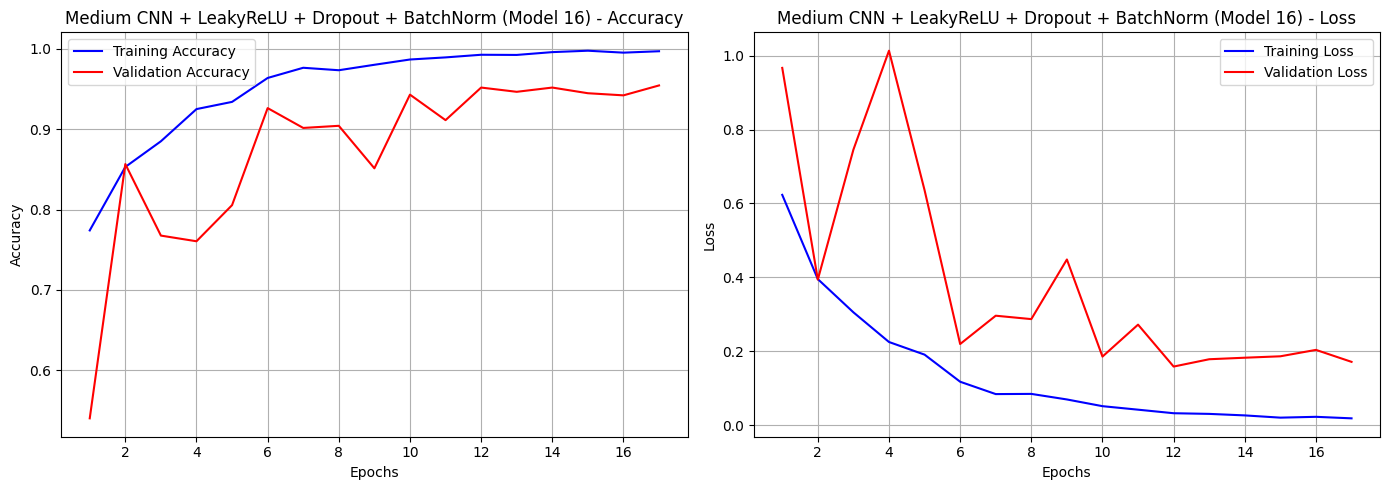

In [8]:
from plot import plot_training_curves

# Plot for Model 16
plot_training_curves(
    history16, 
    model_name="Medium CNN + LeakyReLU + Dropout + BatchNorm (Model 16)"
)

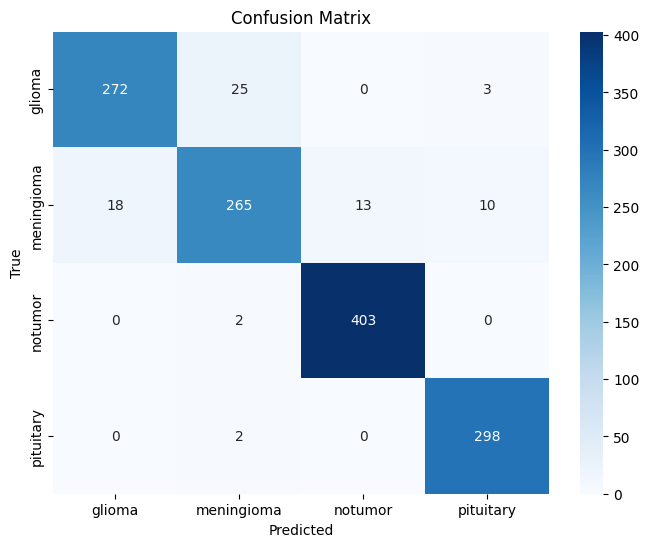


Classification Report:

              precision    recall  f1-score   support

      glioma       0.94      0.91      0.92       300
  meningioma       0.90      0.87      0.88       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.96      0.99      0.98       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



In [2]:
from plot_utils import (
    plot_training_curves,
    evaluate_model_with_confusion,
    plot_confusion_matrix_from_dataset
)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix with in-memory model
# evaluate_model_with_confusion(model19, test_ds, title="Confusion Matrix (Test)")

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model16_best.h5", test_ds, class_names)
